In [3]:
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from folding_algorithms import NussinovAlgorithm, OptimizedNussinovAlgorithm, OptimizedNussinovWithFourRussians, ZukerAlgorithm
from testing import LevenshteinDistance

In [4]:
def process_data(csv_path):
    rna_strands = []
    expected_foldings = []
    combined_data = []

    with open(csv_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            rna_strands.append(row[0])
            expected_foldings.append(row[1])

    combined_data = [list(x) for x in zip(rna_strands, expected_foldings)]
    combined_data = sorted(combined_data, key=lambda x: len(x[0]))
    return combined_data

In [3]:
# The resulted foldings for each algorithm on all data formatted 
# {orig: [<original sequences list>], nussinov: [<Nussinov result list>],
# zuker: [<Zuker result list>], four_russians: [<Four Russians result list>]}
final_results = {"Nussinov": [], "Optimized Nussinov": [], "Zuker": [], "Four Russians Nussinov": []}

In [4]:
final_results = {"Nussinov": [], "Optimized Nussinov": [], "Zuker": [], "Four Russians Nussinov": []}
def evaluate_algorithms(csv_path, iterations_list, combined_data):
    print('started')

    algorithms = [
        ("Nussinov", NussinovAlgorithm),
        ("Optimized Nussinov", OptimizedNussinovAlgorithm),
        ("Four Russians Nussinov", OptimizedNussinovWithFourRussians),
        ("Zuker", ZukerAlgorithm),
    ]

    results = {
        "runtime": {name: [] for name, _ in algorithms},
        "accuracy": {name: [] for name, _ in algorithms},
    }

    for iterations in range(2):
        print('trying ' + str(iterations) + ' iterations')
        for name, algorithm in algorithms:
            print('running the ' + str(name) + ' algorithm')
            total_distance = 0
            start_time = time.time()

            for _ in range(iterations):
                for strand, expected in combined_data:
                    alg_instance = algorithm(strand)
                    predicted = alg_instance.run()
                    levenshtein = LevenshteinDistance([])
                    distance = levenshtein.calculate(predicted, expected)
                    final_results[name] += [(strand, predicted)]
                    end_time = time.time()
                    runtime = end_time - start_time

                    results["runtime"][name].append(runtime)
                    results["accuracy"][name].append(distance)
    return results

In [5]:
def plot_results(results, iterations_list):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    for name, runtimes in results["runtime"].items():
        plt.plot(iterations_list, runtimes, label=name)
    plt.title("Algorithm Runtime")
    plt.xlabel("Sequence Length")
    plt.ylabel("Runtime (seconds)")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    for name, accuracies in results["accuracy"].items():
        plt.plot(iterations_list, accuracies, label=name)
    plt.title("Algorithm Accuracy")
    plt.xlabel("Sequence Length")
    plt.ylabel("Levenshtein Distance")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
csv_path = "../data/RNA_Strands.csv"
combined_data = process_data(csv_path)
length_list = [len(x[0]) for x in combined_data]

results = evaluate_algorithms(csv_path, length_list, combined_data)
print('done!')

started
trying 0 iterations
running the Nussinov algorithm
running the Optimized Nussinov algorithm
running the Four Russians Nussinov algorithm
running the Zuker algorithm
trying 1 iterations
running the Nussinov algorithm
running the Optimized Nussinov algorithm
running the Four Russians Nussinov algorithm
running the Zuker algorithm
done!


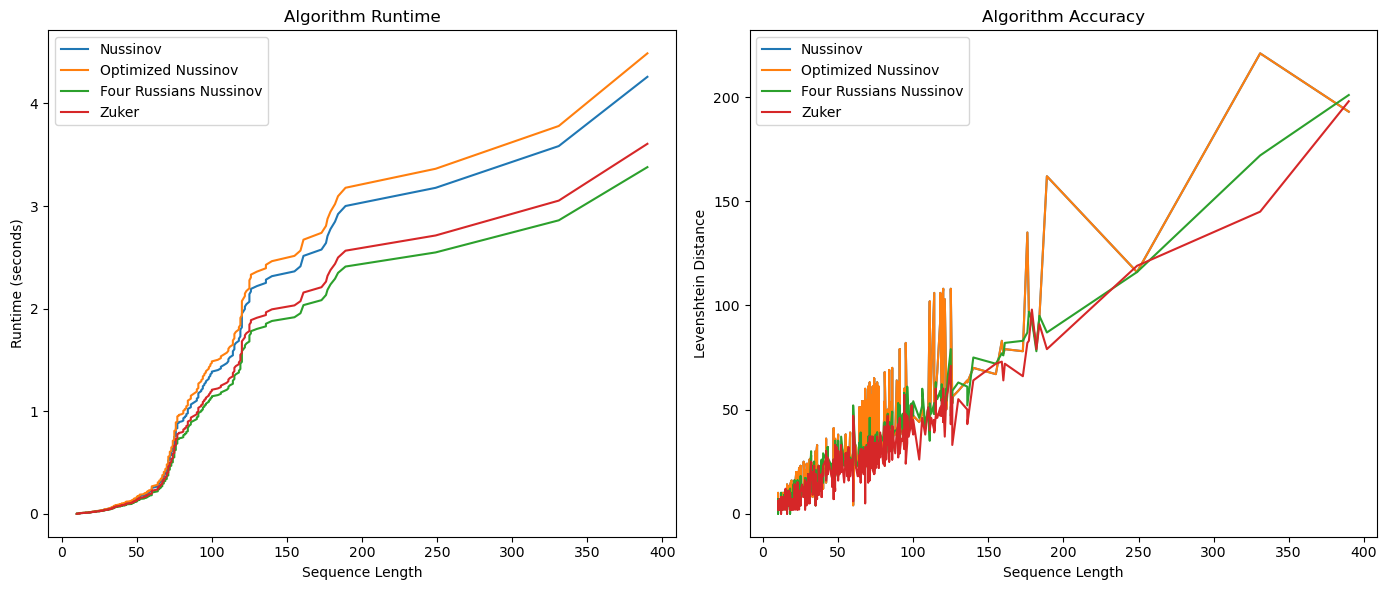

In [7]:
plot_results(results, length_list)

In [8]:
x = np.array(length_list).reshape((-1, 1))
y = np.array(results["accuracy"]["Nussinov"])
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [9]:
x_opt = np.array(length_list).reshape((-1, 1))
y_opt = np.array(results["accuracy"]["Optimized Nussinov"])
model_opt = LinearRegression()
model_opt.fit(x_opt, y_opt)

LinearRegression()

In [10]:
x_z = np.array(length_list).reshape((-1, 1))
y_z = np.array(results["accuracy"]["Zuker"])
model_z = LinearRegression()
model_z.fit(x_z, y_z)

LinearRegression()

In [11]:
y_fr = np.array(results["accuracy"]["Four Russians Nussinov"])
x_fr = np.array(length_list).reshape((-1, 1))
model_fr = LinearRegression()
model_fr.fit(x_fr, y_fr)

LinearRegression()

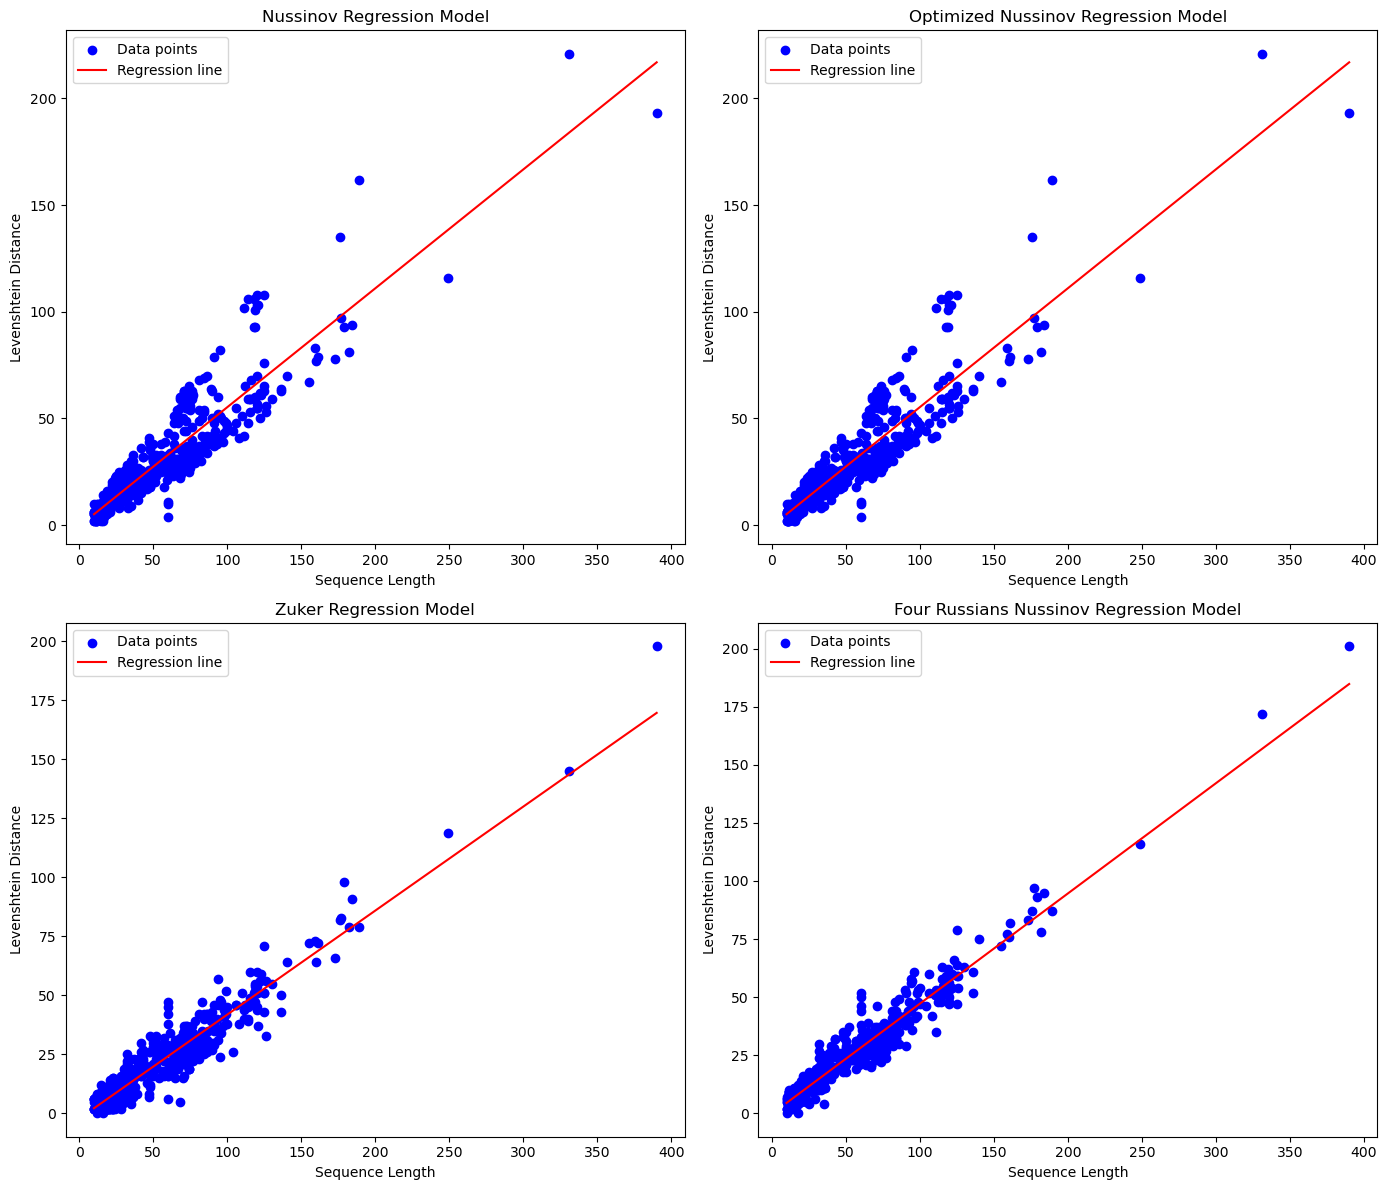

In [12]:
x_pred = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Create evenly spaced values for a smooth line
y_pred = model.predict(x_pred)  # Predict based on the model

plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
# Plotting
plt.scatter(x, y, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(x_pred, y_pred, color='red', label='Regression line')  # Regression line
plt.title('Nussinov Regression Model')
plt.xlabel('Sequence Length')
plt.ylabel('Levenshtein Distance')
plt.legend()

x_pred_opt = np.linspace(x.min(), x_opt.max(), 100).reshape(-1, 1)  # Create evenly spaced values for a smooth line
y_pred_opt = model_opt.predict(x_pred_opt)  # Predict based on the model

plt.subplot(2, 2, 2)

# Plotting
plt.scatter(x_opt, y_opt, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(x_pred_opt, y_pred_opt, color='red', label='Regression line')  # Regression line
plt.title('Optimized Nussinov Regression Model')
plt.xlabel('Sequence Length')
plt.ylabel('Levenshtein Distance')
plt.legend()

x_pred_z = np.linspace(x_z.min(), x_z.max(), 100).reshape(-1, 1)  # Create evenly spaced values for a smooth line
y_pred_z = model_z.predict(x_pred_z)  # Predict based on the model

plt.subplot(2, 2, 3)

# Plotting
plt.scatter(x_z, y_z, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(x_pred_z, y_pred_z, color='red', label='Regression line')  # Regression line
plt.title('Zuker Regression Model')
plt.xlabel('Sequence Length')
plt.ylabel('Levenshtein Distance')
plt.legend()

x_pred_fr = np.linspace(x_fr.min(), x_fr.max(), 100).reshape(-1, 1)  # Create evenly spaced values for a smooth line
y_pred_fr = model_fr.predict(x_pred_fr)  # Predict based on the model

plt.subplot(2, 2, 4)

# Plotting
plt.scatter(x_fr, y_fr, color='blue', label='Data points')  # Scatter plot of the data
plt.plot(x_pred_fr, y_pred_fr, color='red', label='Regression line')  # Regression line
plt.title('Four Russians Nussinov Regression Model')
plt.xlabel('Sequence Length')
plt.ylabel('Levenshtein Distance')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
def mean_square_error(model, x, y):
    tot = 0
    n = len(y)
    for i in range(n):
        tot += (model.predict(x[i].reshape(-1,1)) - y[i])**2
    return tot / n

In [14]:
nussinov_error = mean_square_error(model, x, y)[0]
opt_nussinov_error = mean_square_error(model_opt, x_opt, y_opt)[0]
zuker_error = mean_square_error(model_z, x_z, y_z)[0]
four_russians_error = mean_square_error(model_fr, x_fr, y_fr)[0]

In [15]:
print(f"Nussinov error: ", nussinov_error)
print(f"Optimized Nussinov error: ", opt_nussinov_error)
print(f"Zuker error: ", zuker_error)
print(f"Four Russians error: ", four_russians_error)

Nussinov error:  111.49900812748878
Optimized Nussinov error:  111.49900812748878
Zuker error:  35.421017780581934
Four Russians error:  27.035706623779767


# Results with CNN and all other algorithms

In [21]:
import nn_folding

In [37]:
predictor = nn_folding.RNASecondaryStructurePredictor(max_len=390)
predictor.build_model()
predictor.model.load_weights('rna_structure_model.keras')

test_seq = "GUGAGAUUGUGAAUGGGG"
predicted_strictire = predictor.predict_structure(test_seq)
print("Predicted Structure: ", predicted_strictire)

/Users/ethanhersch/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Predicted Structure:  (((((((.(...))))))


predictor = nn_folding.RNASecondaryStructurePredictor(max_len=390)
predictor.build_model()
predictor.model.load_weights('rna_structure_model.h5')

test_seq = "GUGAGAUUGUGAAGGGAUCUCGCAGGUAUCGUGAGGGAAGUAUGGGGUAGUACGAGAGGAACUCCCAUGCCGUCCUCUAGUUUCUGGGGUUUGUCGAACGGCAAGUGCCCCGAAGCCAUCGCACGGUGGUUCUCGGCUGAACGCCUCUAAGCCAGAAGCCAAUCCCAAGACCAGAUGCCCAC"
predicted_structure = predictor.predict_structure(test_seq)
print("Sequence:", test_seq)
print("Predicted Structure:", predicted_structure)

In [25]:
import pandas as pd

df = pd.read_csv('validation_results.txt', sep='\t')

df['CNN_Lev'] = pd.to_numeric(df['CNN_Lev'], errors='coerce')
df['Zuker_Lev'] = pd.to_numeric(df['Zuker_Lev'], errors='coerce')
df['Nussinov_Lev'] = pd.to_numeric(df['Nussinov_Lev'], errors='coerce')
df['OptNussinov_Lev'] = pd.to_numeric(df['OptNussinov_Lev'], errors='coerce')
df['FourRus_Lev'] = pd.to_numeric(df['FourRus_Lev'], errors='coerce')

cnn_mean = df['CNN_Lev'].mean()
zuker_mean = df['Zuker_Lev'].mean()
nussinov_mean = df['Nussinov_Lev'].mean()
opt_nussinov_mean = df['OptNussinov_Lev'].mean()
four_rus_mean = df['FourRus_Lev'].mean()

print("Average Levenshtein Distances:")
print(f"CNN: {cnn_mean}")
print(f"Zuker: {zuker_mean}")
print(f"Nussinov: {nussinov_mean}")
print(f"Optimized Nussinov: {opt_nussinov_mean}")
print(f"Four Russians: {four_rus_mean}")


Average Levenshtein Distances:
CNN: 20.663636363636364
Zuker: 18.990909090909092
Nussinov: 27.60909090909091
Optimized Nussinov: 27.60909090909091
Four Russians: 23.172727272727272


In [26]:
final_results["CNN"] = []
for _, row in df.iterrows():
    final_results["CNN"].append((row['Sequence'], row['CNN_Pred']))

# More information on folding (favored base pairings)
We will analyze the proposed secondary structure predictions of each algorithm over all of our data to see if specific algorithms tend to prioritize certain base pairings over others

In [21]:
def num_pairings(original_sequence, secondary_structure):
    """
    Given the original sequence and secondary structure, returns the number of times A-U, G-C, G-U are paired
    """
    total = secondary_structure.count('(')
    count_a = 0
    count_c = 0
    for idx, char in enumerate(secondary_structure):
        if char == '(' or char == ')':
            if original_sequence[idx] == 'A':
                count_a += 1
            if original_sequence[idx] == 'C':
                count_c += 1
    return (count_a, count_c, total)

def find_proportion(name):
    """
    Given a specified algorithm returns the percentage of base pairs which are A-U and G-C across all of our testing data
    """
    average = [0,0, 0]
    for (strand, result) in final_results[name]:
        (count_a, count_c, total) = num_pairings(strand, result)
        average[0] += count_a
        average[1] += count_c
        average[2] += total
    [count_a, count_g, total] = average
    return count_a/total, count_g/total, (total - count_a - count_g) / total

In [31]:
print(f"Nussinov (A-U, G-C, G-U)  percentage ",find_proportion("Nussinov"))
print(f"Zuker (A-U, G-C, G-U) percentage ",find_proportion("Zuker"))
print(f"Four Russians Nussinov (A-U, G-C, G-U) percentage ",find_proportion("Four Russians Nussinov"))
print(f"Optimized Nussinov (A-U, G-C, G-U) percentage ",find_proportion("Optimized Nussinov"))
print(f"CNN (A-U, G-C, G-U) percentage ",find_proportion("CNN"))

Nussinov (A-U, G-C, G-U)  percentage  (0.3394495412844037, 0.5270255333259644, 0.13352492538963193)
Zuker (A-U, G-C, G-U) percentage  (0.3697740846533368, 0.5894572838223838, 0.04076863152427941)
Four Russians Nussinov (A-U, G-C, G-U) percentage  (0.3480403661112415, 0.5250723617304233, 0.12688727215833528)
Optimized Nussinov (A-U, G-C, G-U) percentage  (0.3394495412844037, 0.5270255333259644, 0.13352492538963193)
CNN (A-U, G-C, G-U) percentage  (0.25497877897486126, 0.4244205027750571, 0.32060071825008163)


# Average loop length compared between algorithms

In [39]:
def avg_loop_length(sequence):
    tot_length = 0
    num_loops = 0
    i = sequence.find('(')
    if i == -1:
        return 0,0
    s_rev = sequence[::-1]
    j = len(sequence) - s_rev.find(')') - 1
    total_dots = sequence[i:j+1].count('.')
    while i <= j:
        if sequence[i] == '(' and sequence[i+1] == '.':
            num_loops += 1
        i += 1
    return (total_dots, num_loops)

def find_loop_length(algorithm):
    average = [0,0]
    for (strand, result) in final_results[algorithm]:
        (total_dots, num_loops) = avg_loop_length(result)
        average[0] += total_dots
        average[1] += num_loops
    [total_dots, num_loops] = average
    return total_dots/num_loops

In [43]:
print(f"Nussinov loop length ",find_loop_length("Nussinov"))
print(f"Zuker loop length ",find_loop_length("Zuker"))
print(f"Four Russians Nussinov loop length ",find_loop_length("Four Russians Nussinov"))
print(f"Optimized Nussinov loop length ",find_loop_length("Optimized Nussinov"))
print(f"CNN loop length ",find_loop_length("CNN"))

Nussinov loop length  3.6979166666666665
Zuker loop length  1.5424
Four Russians Nussinov loop length  2.7808090310442144
Optimized Nussinov loop length  3.6979166666666665
CNN loop length  3.640909090909091


In [49]:
def find_num_pairings(algorithm):
    total = []
    for (strand, result) in final_results[algorithm]:
        total += [result.count('(')]
    return sum(total)/len(total)

In [50]:
print(f"Nussinov average parings ",find_num_pairings("Nussinov"))
print(f"Zuker average parings ",find_num_pairings("Zuker"))
print(f"Four Russians Nussinov average parings ",find_num_pairings("Four Russians Nussinov"))
print(f"Optimized Nussinov average parings ",find_num_pairings("Optimized Nussinov"))
print(f"CNN average paringsh ",find_num_pairings("CNN"))

Nussinov average parings  16.6
Zuker average parings  21.19816513761468
Four Russians Nussinov average parings  23.455045871559633
Optimized Nussinov average parings  16.6
CNN average paringsh  27.845454545454544


# Favored base pairings based on Zuker score matrix

In [16]:
zuker_results = {"Zuker 1": [], "Zuker 2": [], "Zuker 3": [], "Zuker 4": [], "Zuker 5": []}
def evaluate_algorithms_zuker(csv_path, iterations_list, combined_data):
    print('started')

    algorithms = [
        ("Zuker 1", ZukerAlgorithm, 1),
        ("Zuker 2", ZukerAlgorithm, 2),
        ("Zuker 3", ZukerAlgorithm, 3),
        ("Zuker 4", ZukerAlgorithm, 4),
        ("Zuker 5", ZukerAlgorithm, 5),
    ]

    results = {
        "runtime": {name: [] for name, _, _ in algorithms},
        "accuracy": {name: [] for name, _, _ in algorithms},
    }

    for iterations in range(2):
        print('trying ' + str(iterations) + ' iterations')
        for name, algorithm, score_matrix in algorithms:
            print('running the ' + str(name) + ' algorithm')
            total_distance = 0
            start_time = time.time()

            for _ in range(iterations):
                for strand, expected in combined_data:
                    alg_instance = algorithm(strand, score_matrix)
                    predicted = alg_instance.run()
                    levenshtein = LevenshteinDistance([])
                    distance = levenshtein.calculate(predicted, expected)
                    zuker_results[name] += [(strand, predicted)]
                    end_time = time.time()
                    runtime = end_time - start_time

                    results["runtime"][name].append(runtime)
                    results["accuracy"][name].append(distance)
    return results

In [17]:
csv_path = "../data/RNA_Strands.csv"
combined_data = process_data(csv_path)
length_list = [len(x[0]) for x in combined_data]

zukerresults = evaluate_algorithms_zuker(csv_path, length_list, combined_data)
print('done!')

started
trying 0 iterations
running the Zuker 1 algorithm
running the Zuker 2 algorithm
running the Zuker 3 algorithm
running the Zuker 4 algorithm
running the Zuker 5 algorithm
trying 1 iterations
running the Zuker 1 algorithm
running the Zuker 2 algorithm
running the Zuker 3 algorithm
running the Zuker 4 algorithm
running the Zuker 5 algorithm
done!


In [19]:
def find_proportion_zuker(name):
    """
    Given a specified algorithm returns the percentage of base pairs which are A-U and G-C across all of our testing data
    """
    average = [0,0, 0]
    for (strand, result) in zuker_results[name]:
        (count_a, count_c, total) = num_pairings(strand, result)
        average[0] += count_a
        average[1] += count_c
        average[2] += total
    [count_a, count_g, total] = average
    return count_a/total, count_g/total, (total - count_a - count_g) / total

In [22]:
print(f"Zuker 1 (A-U, G-C, G-U)  percentage ",find_proportion_zuker("Zuker 1"))
print(f"Zuker 2 (A-U, G-C, G-U) percentage ",find_proportion_zuker("Zuker 2"))
print(f"Zuker 3 (A-U, G-C, G-U) percentage ",find_proportion_zuker("Zuker 3"))
print(f"Zuker 4 (A-U, G-C, G-U) percentage ",find_proportion_zuker("Zuker 4"))
print(f"Zuker 5 (A-U, G-C, G-U) percentage ",find_proportion_zuker("Zuker 5"))

Zuker 1 (A-U, G-C, G-U)  percentage  (0.3697740846533368, 0.5894572838223838, 0.04076863152427941)
Zuker 2 (A-U, G-C, G-U) percentage  (0.26681970686915063, 0.6249337806816175, 0.10824651244923185)
Zuker 3 (A-U, G-C, G-U) percentage  (0.3365286732270105, 0.5102646759416356, 0.15320665083135393)
Zuker 4 (A-U, G-C, G-U) percentage  (0.3365286732270105, 0.5102646759416356, 0.15320665083135393)
Zuker 5 (A-U, G-C, G-U) percentage  (0.2221406278685515, 0.6567835505783, 0.12107582155314853)
